In [1]:
!nvidia-smi

Fri Apr 14 13:12:05 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 375.26                 Driver Version: 375.26                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 0000:02:00.0     Off |                  N/A |
|  0%   20C    P8    13W / 200W |    691MiB /  8113MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    Off  | 0000:03:00.0     Off |                  N/A |
|  0%   26C    P2    55W / 200W |   4736MiB /  8112MiB |     36%      Default |
+-------------------------------+----------------------+----------------------+
        

In [2]:
%matplotlib inline

In [3]:
import sys
from time import time

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras import backend as K
from keras.backend.tensorflow_backend import set_session
from keras.datasets import mnist

sys.path.append('..')
from models.autoencoder import Autoencoder, VariationalAutoencoder

Using TensorFlow backend.


In [4]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [5]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth=True
set_session(tf.Session(config=config))

In [6]:
def plot_hist(hist):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(hist.history["loss"], "r", label="train loss")
    val_loss = hist.history.get("val_loss")
    if val_loss is not None:
        plt.plot(val_loss, "b", label="validation loss")
    plt.legend()
    plt.title("Model loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.show()

In [7]:
def plot_predictions(model, data):
    pred = model.predict(data)
    n = len(data)
    plt.figure(figsize=(2 * n, 4))
    plt.gray()
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(data[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(pred[i])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [8]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

### Autoencoder

In [9]:
ae = Autoencoder((28, 28), [256, 64, 16], "relu", "sigmoid")
ae.compile(optimizer="adam", loss="binary_crossentropy")

In [10]:
t = time()
hist = ae.fit(x_train, validation_data=x_test,
              nb_epoch=1000, batch_size=5000, shuffle=True, verbose=2)
print("\nElapsed time: ", time() - t, "seconds")

Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
1s - loss: 0.5883 - val_loss: 0.3711
Epoch 2/1000
0s - loss: 0.3180 - val_loss: 0.2843
Epoch 3/1000
0s - loss: 0.2728 - val_loss: 0.2599
Epoch 4/1000
0s - loss: 0.2521 - val_loss: 0.2433
Epoch 5/1000
0s - loss: 0.2381 - val_loss: 0.2303
Epoch 6/1000
0s - loss: 0.2243 - val_loss: 0.2149
Epoch 7/1000
0s - loss: 0.2092 - val_loss: 0.2006
Epoch 8/1000
0s - loss: 0.1974 - val_loss: 0.1911
Epoch 9/1000
0s - loss: 0.1888 - val_loss: 0.1828
Epoch 10/1000
0s - loss: 0.1806 - val_loss: 0.1747
Epoch 11/1000
0s - loss: 0.1731 - val_loss: 0.1680
Epoch 12/1000
0s - loss: 0.1670 - val_loss: 0.1627
Epoch 13/1000
0s - loss: 0.1620 - val_loss: 0.1585
Epoch 14/1000
0s - loss: 0.1579 - val_loss: 0.1543
Epoch 15/1000
0s - loss: 0.1540 - val_loss: 0.1507
Epoch 16/1000
0s - loss: 0.1506 - val_loss: 0.1472
Epoch 17/1000
0s - loss: 0.1476 - val_loss: 0.1451
Epoch 18/1000
0s - loss: 0.1450 - val_loss: 0.1422
Epoch 19/1000
0s - loss: 0.1426 - val_los

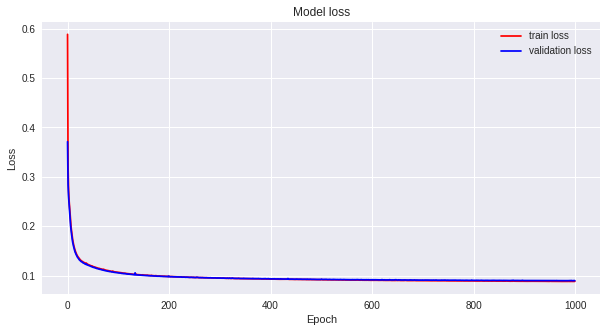

In [11]:
plot_hist(hist)

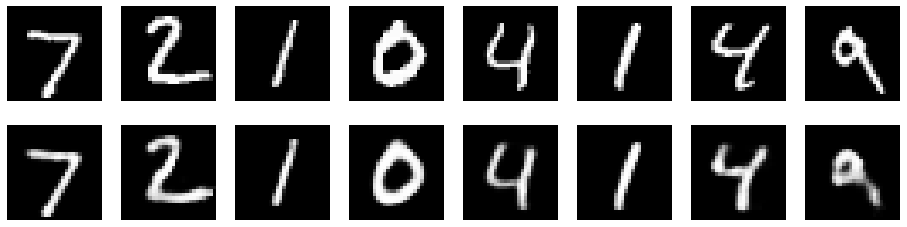

In [12]:
plot_predictions(ae, x_test[:8])

### Variational Autoencoder

In [13]:
vae = VariationalAutoencoder((28, 28), [256, 64, 16], "relu")
vae.compile(optimizer="adam")

In [14]:
t = time()
hist = vae.fit(x_train, validation_data=x_test,
               nb_epoch=1000, batch_size=5000, shuffle=True, verbose=2)
print("\nElapsed time: ", time() - t, "seconds")

Train on 60000 samples, validate on 10000 samples
Epoch 1/1000
0s - loss: 481.3466 - val_loss: 361.0838
Epoch 2/1000
0s - loss: 278.3839 - val_loss: 229.5435
Epoch 3/1000
0s - loss: 219.4943 - val_loss: 212.0073
Epoch 4/1000
0s - loss: 209.5219 - val_loss: 207.0815
Epoch 5/1000
0s - loss: 206.2358 - val_loss: 204.8678
Epoch 6/1000
0s - loss: 204.2770 - val_loss: 203.2724
Epoch 7/1000
0s - loss: 202.5763 - val_loss: 201.2841
Epoch 8/1000
0s - loss: 200.3127 - val_loss: 198.3470
Epoch 9/1000
0s - loss: 197.3255 - val_loss: 194.9834
Epoch 10/1000
0s - loss: 193.6428 - val_loss: 190.7541
Epoch 11/1000
0s - loss: 190.1366 - val_loss: 187.4272
Epoch 12/1000
0s - loss: 187.0887 - val_loss: 184.6942
Epoch 13/1000
0s - loss: 184.6624 - val_loss: 182.2569
Epoch 14/1000
0s - loss: 182.3673 - val_loss: 179.8980
Epoch 15/1000
0s - loss: 179.8317 - val_loss: 177.2733
Epoch 16/1000
0s - loss: 177.3159 - val_loss: 175.0366
Epoch 17/1000
0s - loss: 174.8131 - val_loss: 172.4462
Epoch 18/1000
0s - loss:

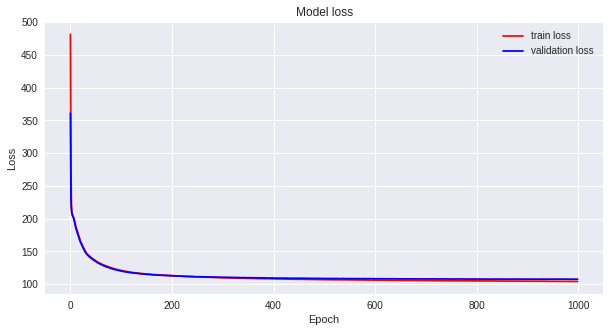

In [15]:
plot_hist(hist)

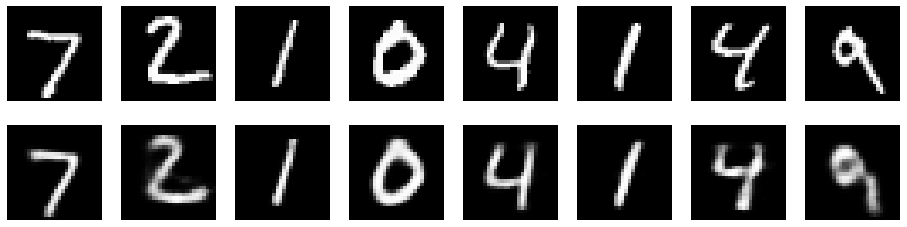

In [16]:
plot_predictions(vae, x_test[:8])